
# kNN - k-nearest neighbors algorithm

---

### Algorithm:
1. Standardize the data and choose the k (for example k=5);
2. Take the first observation in test data (where the labels are unknown);
3. Calculate the distance from the first taken observation to every point in train data and store it in a new dataframe (new dataframe can be a copy of train dataframe with new column = `distance`);
4. Sort the obtained distances (dataframe) from lowest to highest;
5. Select the first k-points closest to our observation;
6. Majority class of this k-points is the class prediction to our observation;
7. Repeat the algorithm for every point in the test data.

#### Try to code the given algorithm.

## kNN in sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns = ['Id', 'SepalLengthCm', 'SepalWidthCm'])
df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


### Standardize

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df['PetalLengthCm'] = scaler.fit_transform(df[['PetalLengthCm']])
df['PetalWidthCm'] = scaler.fit_transform(df[['PetalWidthCm']])


In [6]:
df = df[df['Species'] != 'Iris-setosa']

In [7]:
# для упрощения скажем, что у нас 2 класса.
df['Species'] = df['Species'].map({'Iris-versicolor': 0,
                                   'Iris-virginica': 1})
df.head()

,PetalLengthCm,PetalWidthCm,Species
50,0.535296,0.264699,0
51,0.421564,0.396172,0
52,0.649027,0.396172,0
53,0.137236,0.133226,0
54,0.478430,0.396172,0


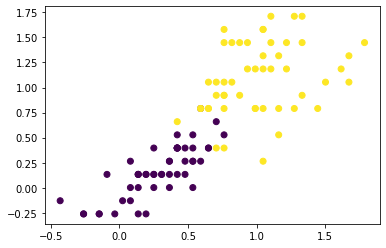

In [8]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species']);

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLengthCm', 'PetalWidthCm']],
                                                    df[['Species']],
                                                    test_size = 0.2,
                                                    random_state = 5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [12]:
%%time
model = kNN(n_neighbors = 5)
model.fit(X_train, y_train['Species'])
y_pred = model.predict(X_test)

Wall time: 4.02 ms


In [13]:
model.score(X_test, y_test)

0.9

In [14]:
y_test

,Species
116,1
82,0
96,0
78,0
124,1
73,0
60,0
70,0
67,0
85,0


In [15]:
# lab 3

In [16]:
len(X_test)

20

In [17]:
X_test.iloc[[0],[0]]

,PetalLengthCm
116,0.990221


In [18]:
new_y_test=[]
for i in range(0,20):
    for index, row in X_test.iloc[[i],:].iterrows():
        distance=[]
        y1 = y_train.copy()
        for index1,row1 in X_train.iterrows():
            distance.append(sqrt((row[0]- row1[0])**2 + (row[1]- row1[1])**2))
        y1['dist']= distance 
        b=y1.sort_values('dist').iloc[0:5,0]
        new_y_test.append(b.mode()[0])
        i += 1


        

In [19]:
new_y_test

[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]

In [20]:
y_pred = pd.DataFrame (new_y_test, columns = ['Species'])

In [21]:
y_test

,Species
116,1
82,0
96,0
78,0
124,1
73,0
60,0
70,0
67,0
85,0


In [22]:
b= list(y_test["Species"])

In [23]:
trues = 0
list_of_y_test= list(y_test["Species"])
for i in range(len(new_y_test)):
    if list_of_y_test[i] == new_y_test[i]:
        trues += 1
        
print(trues)
    


18


In [29]:
18/20

0.9

In [30]:
model.score(X_test, y_test)

0.9